<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">LA POULE QUI CHANTE :
Analyse et exploration des données</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
#Importation de la librairie plotly express
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [7]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [9]:
#Importation du fichier donneesp11.csv
df_data = pd.read_csv("donneesp11.csv")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse de df_data</h3>
</div>

In [12]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_data.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_data.shape[1]))

Le tableau comporte 145 observation(s) ou article(s)
Le tableau comporte 14 colonne(s)


In [13]:
#La nature des données dans chacune des colonnes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        145 non-null    object 
 1   Année                       145 non-null    int64  
 2   Population                  145 non-null    int64  
 3   Volailles alimentaire en t  145 non-null    float64
 4   Volailles produites en t    145 non-null    float64
 5   Volailles importées en t    145 non-null    float64
 6   Volailles exportées en t    145 non-null    float64
 7   Balance                     145 non-null    float64
 8   PIB par habitants en $      145 non-null    float64
 9   Restaurants KFC             145 non-null    float64
 10  Stabilite politique         145 non-null    float64
 11  Distance                    145 non-null    int64  
 12  volailleskg / habitant      145 non-null    float64
 13  Deficit / habitant          145 non

In [14]:
#Affichage des 5 premières lignes de la table
df_data.head()

,Zone,Année,Population,Volailles alimentaire en t,Volailles produites en t,Volailles importées en t,Volailles exportées en t,Balance,PIB par habitants en $,Restaurants KFC,Stabilite politique,Distance,volailleskg / habitant,Deficit / habitant
0,Afghanistan,2017,36296113,55000.0,28000.0,29000.0,0.0,-29000.0,534.02,0.0,-2.79,5490,1.52,17.84
1,Afrique du Sud,2017,57009756,2035000.0,1667000.0,514000.0,63000.0,-451000.0,6723.93,955.0,-0.28,8702,35.70,-16.34
2,Albanie,2017,2884169,47000.0,13000.0,38000.0,0.0,-38000.0,4521.75,8.0,0.37,8459,16.30,3.06
3,Algérie,2017,41389189,264000.0,275000.0,2000.0,0.0,-2000.0,4134.94,2.0,-0.92,2070,6.38,12.98
4,Allemagne,2017,82658409,1609000.0,1514000.0,842000.0,646000.0,-196000.0,44670.22,189.0,0.57,804,19.47,-0.11


In [15]:
#La nature des données dans chacune des colonnes
df_data.describe()

,Année,Population,Volailles alimentaire en t,Volailles produites en t,Volailles importées en t,Volailles exportées en t,Balance,PIB par habitants en $,Restaurants KFC,Stabilite politique,Distance,volailleskg / habitant,Deficit / habitant
count,145.0,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2017.0,4.559043e+07,6.716000e+05,7.471724e+05,8.861379e+04,1.138966e+05,2.528276e+04,13928.702690,154.800000,-0.068483,6078.717241,19.362621,-0.002621
std,0.0,1.658454e+08,2.276803e+06,2.660727e+06,1.874579e+05,4.944800e+05,5.044014e+05,19521.991465,758.834382,0.862795,3893.654658,15.026742,15.026742
min,2017.0,7.145800e+04,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.059000e+06,414.740000,0.000000,-2.790000,0.000000,0.130000,-48.080000
25%,2017.0,2.944791e+06,3.100000e+04,1.700000e+04,3.000000e+03,0.000000e+00,-3.500000e+04,1941.870000,0.000000,-0.630000,2375.000000,5.970000,-9.130000
50%,2017.0,9.785843e+06,1.010000e+05,7.200000e+04,1.600000e+04,1.000000e+03,-7.000000e+03,5918.260000,5.000000,-0.040000,6097.000000,17.060000,2.300000
75%,2017.0,2.981677e+07,3.300000e+05,3.400000e+05,7.800000e+04,1.200000e+04,0.000000e+00,16110.310000,25.000000,0.600000,8545.000000,28.490000,13.390000
max,2017.0,1.421022e+09,1.810000e+07,2.191400e+07,1.069000e+06,4.223000e+06,4.220000e+06,110203.010000,7980.000000,1.560000,19096.000000,67.440000,19.230000


In [16]:
#Création d'un df séparé pour isoler les des lignes "Brésil", "Inde", "États-Unis d'Amérique", "Chine, continentale"

#Liste des zones à isoler
zones_to_isolate = ["Brésil", "Inde", "États-Unis d'Amérique", "Chine, continentale"]

#Création du DataFrame contenant uniquement ces zones
df_iso = df_data[df_data['Zone'].isin(zones_to_isolate)].reset_index(drop=True)

#Suppression de ces lignes du DataFrame initial
df_data = df_data[~df_data['Zone'].isin(zones_to_isolate)].reset_index(drop=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse de df_iso</h3>
</div>

In [18]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_iso.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_iso.shape[1]))

Le tableau comporte 4 observation(s) ou article(s)
Le tableau comporte 14 colonne(s)


In [19]:
#La nature des données dans chacune des colonnes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        141 non-null    object 
 1   Année                       141 non-null    int64  
 2   Population                  141 non-null    int64  
 3   Volailles alimentaire en t  141 non-null    float64
 4   Volailles produites en t    141 non-null    float64
 5   Volailles importées en t    141 non-null    float64
 6   Volailles exportées en t    141 non-null    float64
 7   Balance                     141 non-null    float64
 8   PIB par habitants en $      141 non-null    float64
 9   Restaurants KFC             141 non-null    float64
 10  Stabilite politique         141 non-null    float64
 11  Distance                    141 non-null    int64  
 12  volailleskg / habitant      141 non-null    float64
 13  Deficit / habitant          141 non

In [20]:
#Affichage des lignes de la table
df_iso

,Zone,Année,Population,Volailles alimentaire en t,Volailles produites en t,Volailles importées en t,Volailles exportées en t,Balance,PIB par habitants en $,Restaurants KFC,Stabilite politique,Distance,volailleskg / habitant,Deficit / habitant
0,Brésil,2017,207833823,9982000.0,14201000.0,3000.0,4223000.0,4220000.0,9896.72,0.0,-0.48,8354,48.03,-28.67
1,"Chine, continentale",2017,1421021791,17518000.0,18236000.0,452000.0,576000.0,124000.0,8729.14,7980.0,-0.23,8139,12.33,7.03
2,Inde,2017,1338676785,2965000.0,3545000.0,0.0,4000.0,4000.0,1937.92,395.0,-0.77,7234,2.21,17.15
3,États-Unis d'Amérique,2017,325084756,18100000.0,21914000.0,123000.0,3692000.0,3569000.0,59468.23,4062.0,0.26,7714,55.68,-36.32


In [21]:
#La nature des données dans chacune des colonnes
df_iso.describe()

,Année,Population,Volailles alimentaire en t,Volailles produites en t,Volailles importées en t,Volailles exportées en t,Balance,PIB par habitants en $,Restaurants KFC,Stabilite politique,Distance,volailleskg / habitant,Deficit / habitant
count,4.0,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2017.0,8.231543e+08,1.214125e+07,1.447400e+07,144500.000000,2.123750e+06,1.979250e+06,20008.002500,3109.250000,-0.305000,7860.250000,29.562500,-10.202500
std,0.0,6.454718e+08,7.148008e+06,7.937754e+06,212854.410337,2.141271e+06,2.227991e+06,26539.833013,3726.773705,0.436539,494.997896,26.257003,26.257003
min,2017.0,2.078338e+08,2.965000e+06,3.545000e+06,0.000000,4.000000e+03,4.000000e+03,1937.920000,0.000000,-0.770000,7234.000000,2.210000,-36.320000
25%,2017.0,2.957720e+08,8.227750e+06,1.153700e+07,2250.000000,4.330000e+05,9.400000e+04,7031.335000,296.250000,-0.552500,7594.000000,9.800000,-30.582500
50%,2017.0,8.318808e+08,1.375000e+07,1.621850e+07,63000.000000,2.134000e+06,1.846500e+06,9312.930000,2228.500000,-0.355000,7926.500000,30.180000,-10.820000
75%,2017.0,1.359263e+09,1.766350e+07,1.915550e+07,205250.000000,3.824750e+06,3.731750e+06,22289.597500,5041.500000,-0.107500,8192.750000,49.942500,9.560000
max,2017.0,1.421022e+09,1.810000e+07,2.191400e+07,452000.000000,4.223000e+06,4.220000e+06,59468.230000,7980.000000,0.260000,8354.000000,55.680000,17.150000


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1. - ACP df_data</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.1. - Choix du nombre de composantes</h3>
</div>

In [25]:
#Suppression des colonnes non numériques
df_quant = df_data.drop(columns=["Zone", "Année"])
X = df_quant.values

#Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
#Verification de la moyenne à 0 et de l'écart type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
#Instance ACP
pca = PCA()
pca.fit(X_scaled)

PCA()

In [28]:
#Visualisation de la variance
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([33.73, 21.74, 14.74, 10.68,  6.62,  5.12,  2.83,  2.33,  2.08,
        0.13,  0.  ,  0.  ])

In [29]:
#Visualisation de la variance cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 34.,  55.,  70.,  81.,  88.,  93.,  95.,  98., 100., 100., 100.,
       100.])

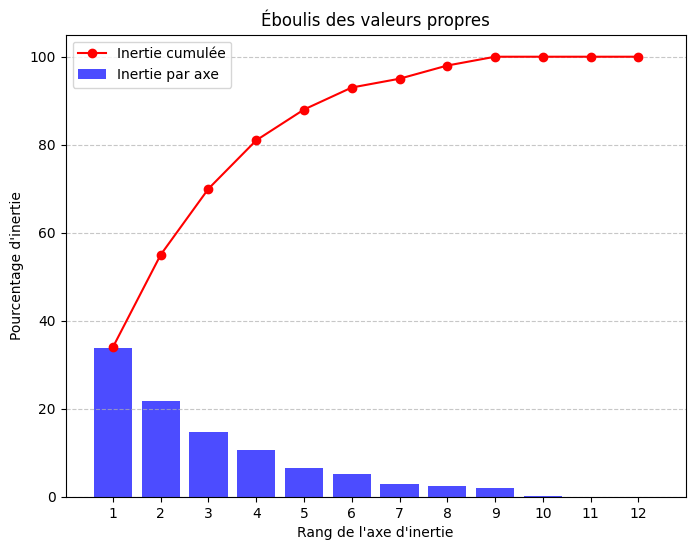

In [30]:
#Création du graphique
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scree) +1), scree, alpha=0.7, color="blue", label="Inertie par axe")
plt.plot(range(1, len(scree) +1), scree_cum, marker='o', color='red', label="Inertie cumulée")
plt.title("Éboulis des valeurs propres")
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.xticks(range(1, len(scree) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
#Déterminer le nombre de composantes nécessaires pour expliquer 80% de la variance
scree_cum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(scree_cum >= 0.8) + 1

print(f"Nombre de composantes retenues : {n_components}")

Nombre de composantes retenues : 4


In [32]:
#Appliquer l'ACP avec le nombre de composantes sélectionné
pca_reduced = PCA(n_components=n_components)
X_pca = pca_reduced.fit_transform(X_scaled)

In [33]:
#Transformation en DataFrame
df_scaled = pd.DataFrame({
    "PC1" : X_scaled[:,0], 
    "PC2" : X_scaled[:,1],
    "PC3" : X_scaled[:,2],
    "PC4" : X_scaled[:,3],
    "Zone" : df_data["Zone"],})

#Premières lignes
df_scaled.head()

,PC1,PC2,PC3,PC4,Zone
0,0.320426,-0.479314,-0.526388,-0.310917,Afghanistan
1,0.840410,2.779533,2.089916,2.287723,Afrique du Sud
2,-0.518329,-0.492481,-0.550332,-0.262695,Albanie
3,0.448280,-0.135324,-0.132106,-0.455584,Algérie
4,1.484279,2.078387,1.845685,4.045153,Allemagne


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.2. - Cercle des corrélations</h3>
</div>

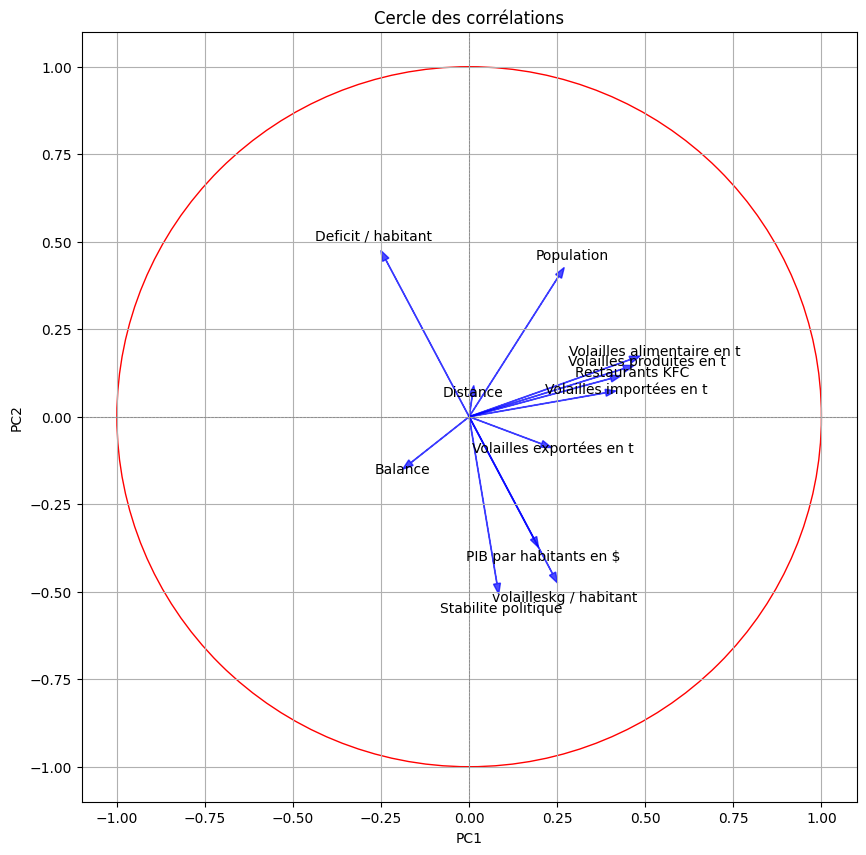

In [35]:
def cercle_corr(pca, features, component1=0, component2=1):
    pcs = pca.components_
    plt.figure(figsize=(10, 10))
    
    #Tracé des flèches pour chaque variable
    for i, feature in enumerate(features):
        plt.arrow(0, 0, pcs[component1, i], pcs[component2, i], 
                  color='blue', alpha=0.7, head_width=0.02, head_length=0.03)
        plt.text(pcs[component1, i]*1.15, pcs[component2, i]*1.15, 
                 feature, color='black', ha='center', va='center')
    
    #Ajout du cercle
    circle = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='-', linewidth=1)
    plt.gca().add_artist(circle)
    
    #Paramètres du graphique
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
    plt.xlabel(f'PC{component1+1}')
    plt.ylabel(f'PC{component2+1}')
    plt.grid()
    plt.title('Cercle des corrélations')
    plt.show()

#Appel de la fonction pour PC1 / PC2
cercle_corr(pca, df_quant.columns, component1=0, component2=1)

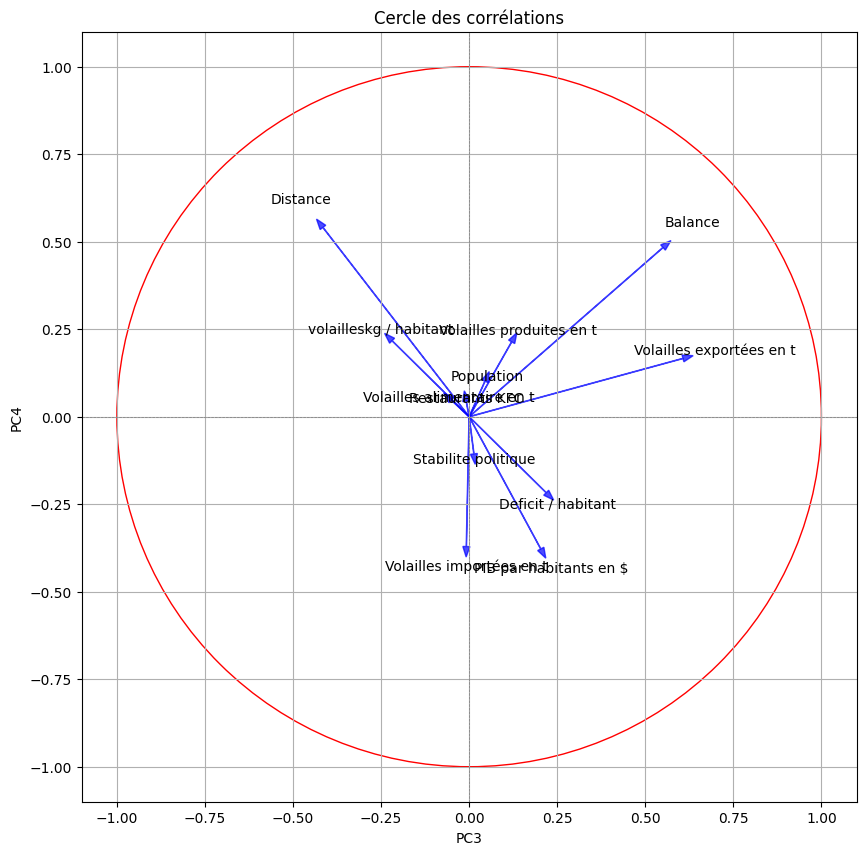

In [36]:
#Appel de la fonction pour PC3 / PC4
cercle_corr(pca, df_quant.columns, component1=2, component2=3)

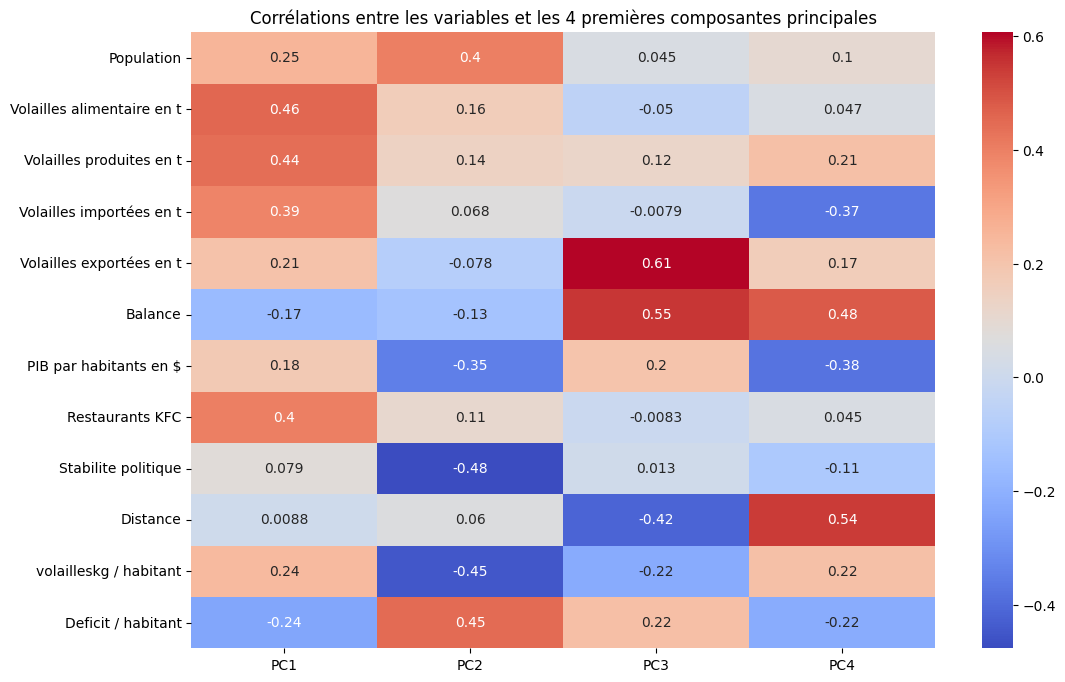

In [37]:
#Matrice de corrélation limitée aux 4 premières composantes principales
correlation_matrix = pd.DataFrame(
    pca.components_[:4],
    columns=df_quant.columns, 
    index=[f'PC{i+1}' for i in range(4)])

#Tracer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Corrélations entre les variables et les 4 premières composantes principales')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.3. - Projections des individus</h3>
</div>

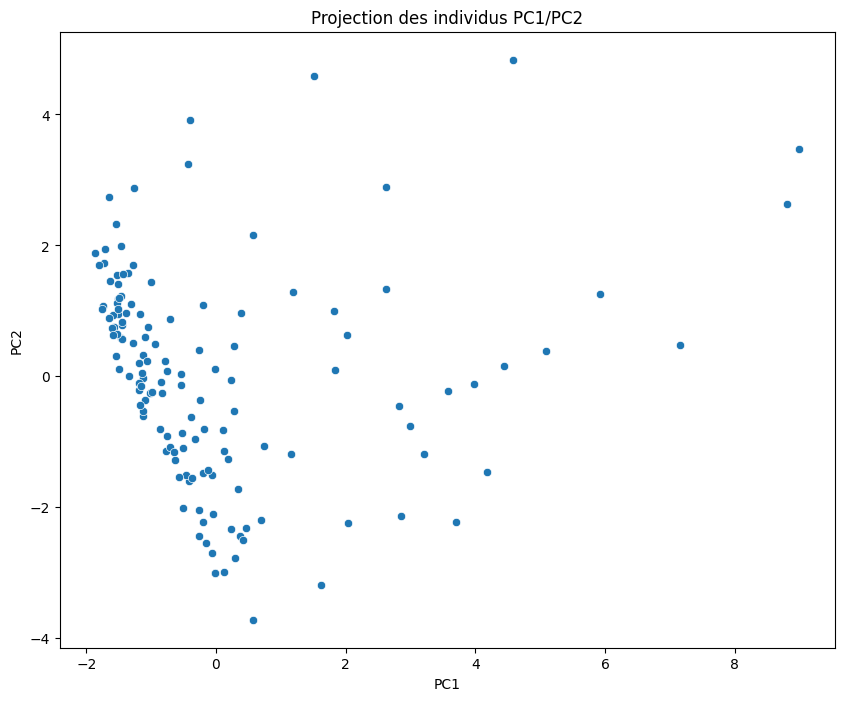

In [39]:
#Projection des individus
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individus PC1/PC2')
plt.show()

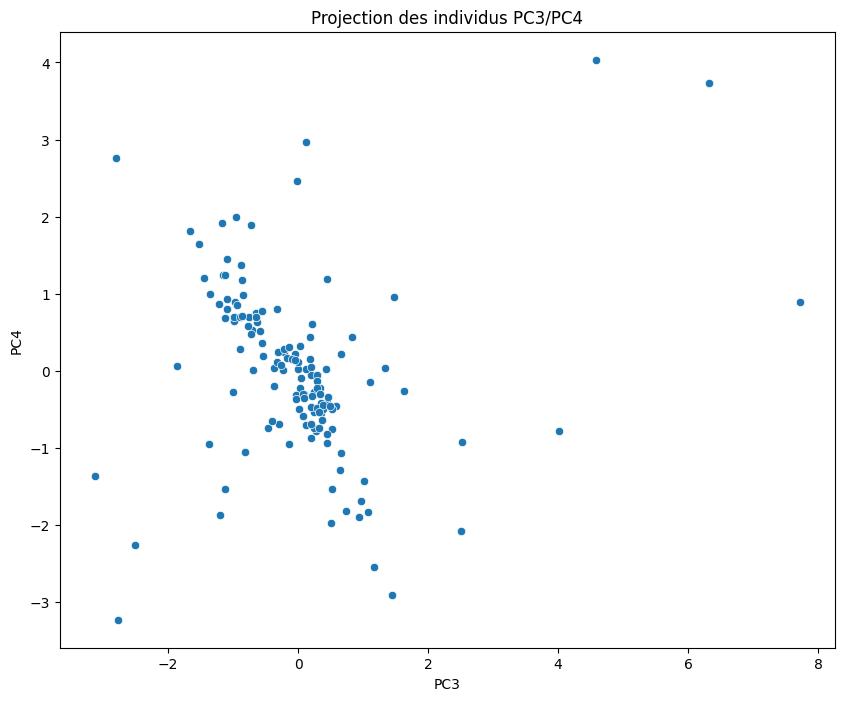

In [41]:
#Projection des individus
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:,2], y=X_pca[:, 3])
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Projection des individus PC3/PC4')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.4. - Classification ascendante hiérarchique</h3>
</div>

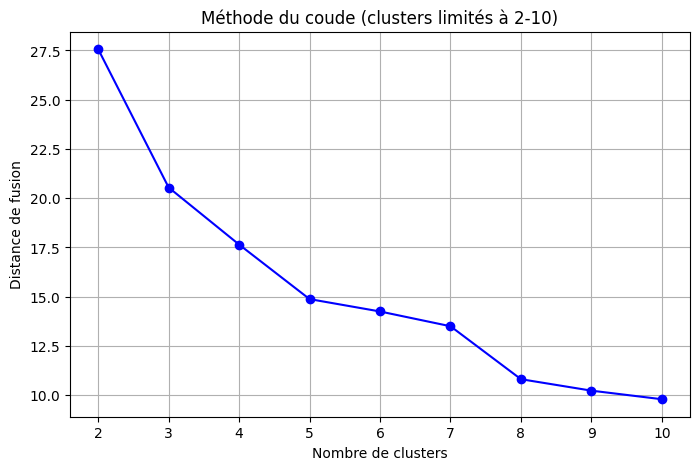

In [43]:
#Détermination du nombre de clusters
link = linkage(X_scaled, method='ward')

max_clusters = 10
distances = link[-(max_clusters - 1):, 2]
nb_clusters = range(max_clusters, 1, -1)

# Visualisation de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(nb_clusters, distances, marker='o', color='b')
plt.title('Méthode du coude (clusters limités à 2-10)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distance de fusion')
plt.xticks(nb_clusters)
plt.grid()
plt.show()

In [44]:
#Découpage en 5 clusters à partir de la matrice de liaison
num_clusters = 5
clusters_CAH = fcluster(link, t=num_clusters, criterion='maxclust')
df_scaled['Cluster_CAH'] = clusters_CAH

distance_threshold = link[-(num_clusters - 1), 2]
print(f"Seuil de couleur pour 5 clusters : {distance_threshold}")

Seuil de couleur pour 5 clusters : 14.880698835442589


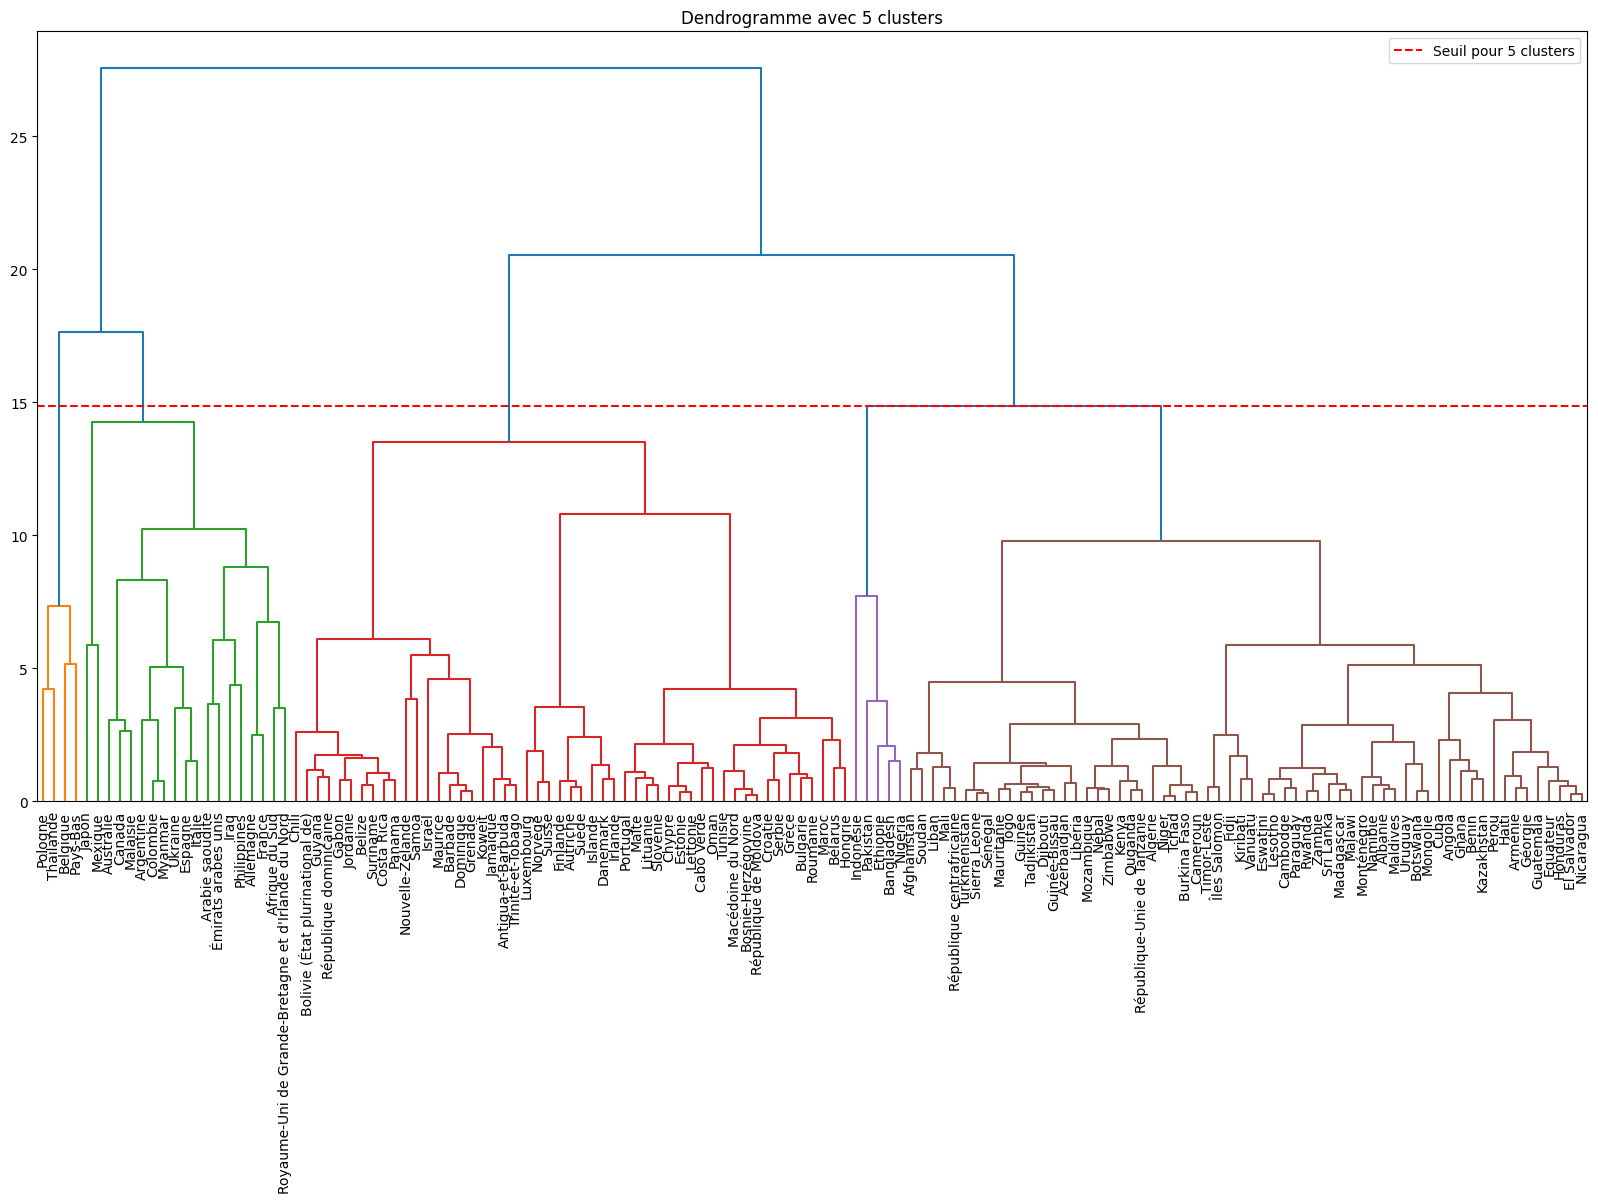

In [46]:
#Tracer le dendrogramme
plt.figure(figsize=(20, 10))
dendrogram(link, 
           labels=df_scaled['Zone'].values,
           leaf_rotation=90, 
           leaf_font_size=10, 
           color_threshold=distance_threshold)
plt.title('Dendrogramme avec 5 clusters')
plt.axhline(y=distance_threshold, color='r', linestyle='--', label='Seuil pour 5 clusters')
plt.legend()
plt.show()

In [50]:
#Suppression de la colonne 'Zone' avant de faire le clustering
df_scaledquant = df_scaled.drop('Zone', axis=1)

#Effectuer le clustering hiérarchique avec le bon paramètre
model = AgglomerativeClustering(n_clusters=5)
df_scaledquant['Cluster_CAH'] = model.fit_predict(df_scaledquant.drop('Cluster_CAH', axis=1))

In [56]:
#Nombre de valeurs par clusters
# Calcul du nombre de valeurs par cluster
df_scaled['Cluster_CAH'] = df_scaledquant['Cluster_CAH']
cluster_counts = df_scaled['Cluster_CAH'].value_counts()

#Afficher les résultats
print(cluster_counts)

#Ajout des cluster au df_data
df_data['Cluster_CAH'] = df_scaled['Cluster_CAH']

Cluster_CAH
3    111
1     14
4      7
0      5
2      4
Name: count, dtype: int64


In [60]:
#Calculer la composition des clusters par rapport aux autres colonnes
cluster_compo = df_scaled.groupby('Cluster_CAH')['Zone'].value_counts()

#Afficher les résultats
for cluster, zones in cluster_compo.groupby(level=0):
    print(f"Cluster {cluster}:")
    print(zones)
    print("-" * 30)

Cluster 0:
Cluster_CAH  Zone      
0            Bangladesh    1
             Indonésie     1
             Nigéria       1
             Pakistan      1
             Éthiopie      1
Name: count, dtype: int64
------------------------------
Cluster 1:
Cluster_CAH  Zone          
1            Afrique du Sud    1
             Argentine         1
             Australie         1
             Canada            1
             Colombie          1
             Espagne           1
             France            1
             Italie            1
             Malaisie          1
             Myanmar           1
             Philippines       1
             Pologne           1
             Thaïlande         1
             Ukraine           1
Name: count, dtype: int64
------------------------------
Cluster 2:
Cluster_CAH  Zone                                               
2            Allemagne                                              1
             Japon                                         

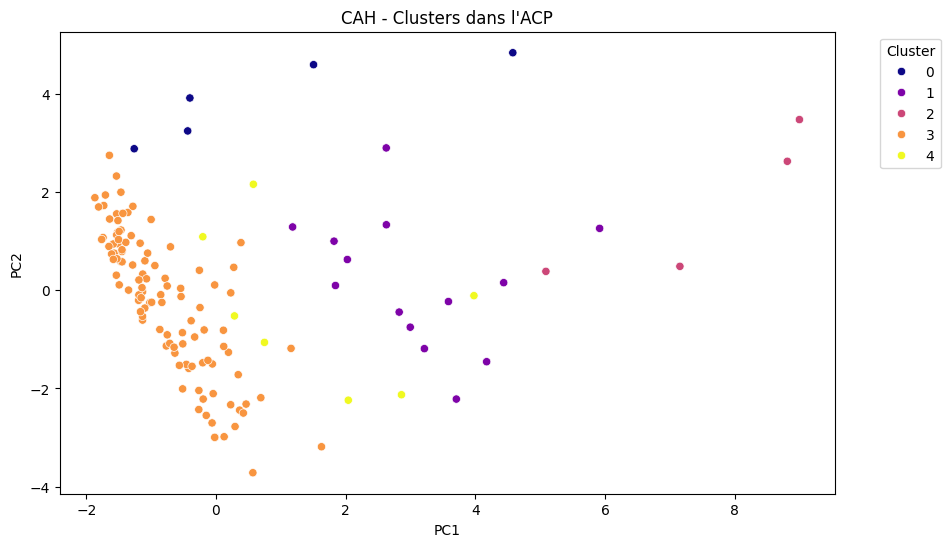

In [63]:
#Visualisation des clusters dans l'ACP pour PC1 et PC2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_scaled['Cluster_CAH'], palette="plasma")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('CAH - Clusters dans l\'ACP')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

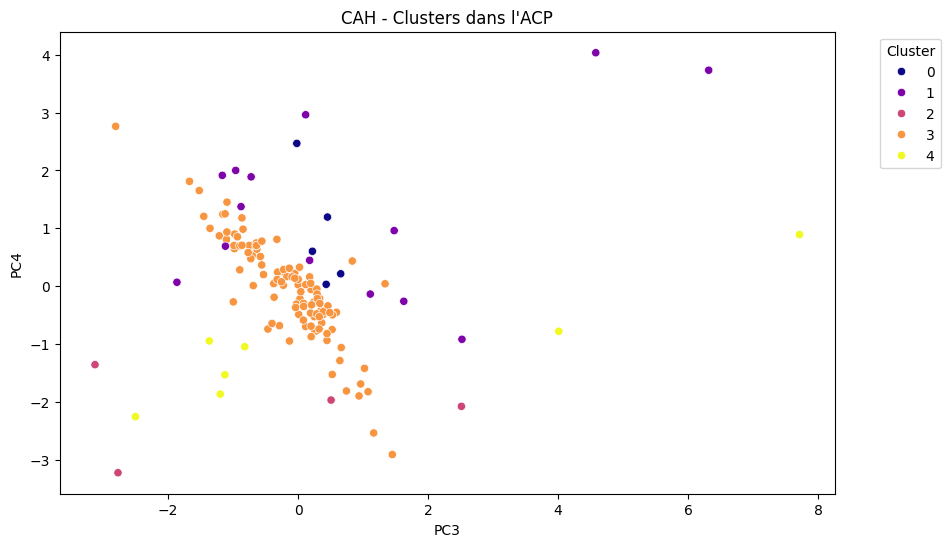

In [67]:
#Visualisation des clusters dans l'ACP pour PC3 et PC4
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 2], y=X_pca[:, 3], hue=df_scaled['Cluster_CAH'], palette="plasma")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('CAH - Clusters dans l\'ACP')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

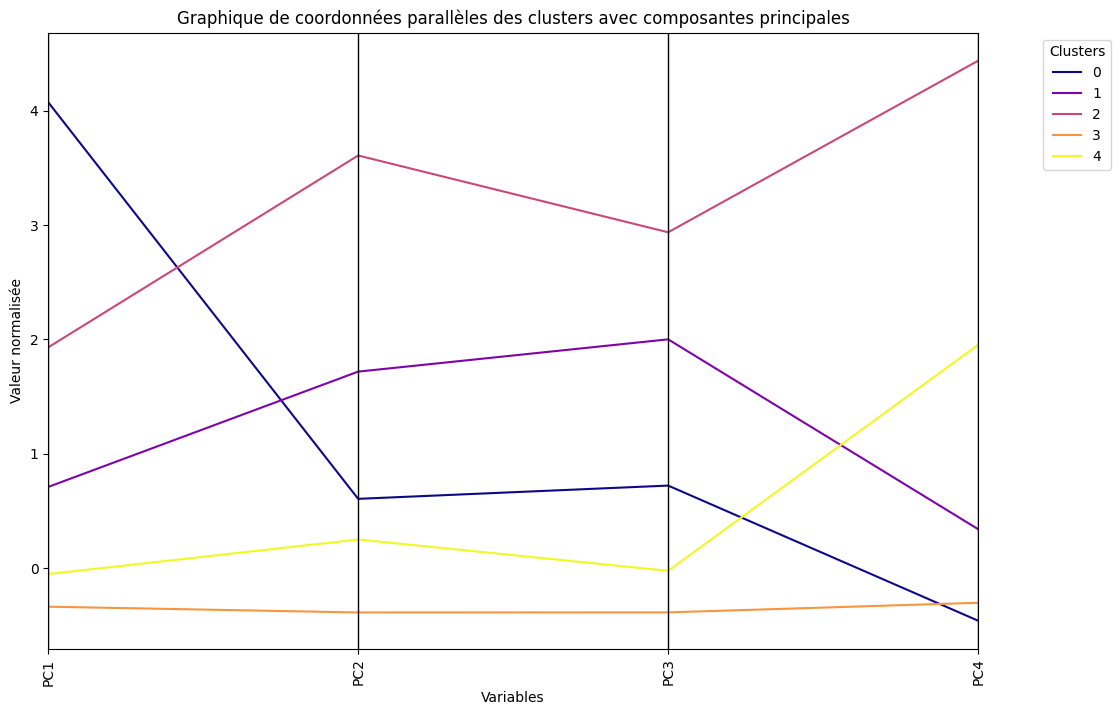

In [68]:
#Graphique coordonées parallèles avec composantes principales
df_scaledmean = df_scaled.drop(columns=["Zone"])
df_scaledmeanCAH = df_scaledmean.groupby("Cluster_CAH").mean().reset_index()

plt.figure(figsize=(12, 8))
parallel_coordinates(df_scaledmeanCAH, 'Cluster_CAH', colormap=plt.cm.plasma)
plt.title('Graphique de coordonnées parallèles des clusters avec composantes principales')
plt.xlabel('Variables')
plt.ylabel('Valeur normalisée')
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.grid()
plt.show()

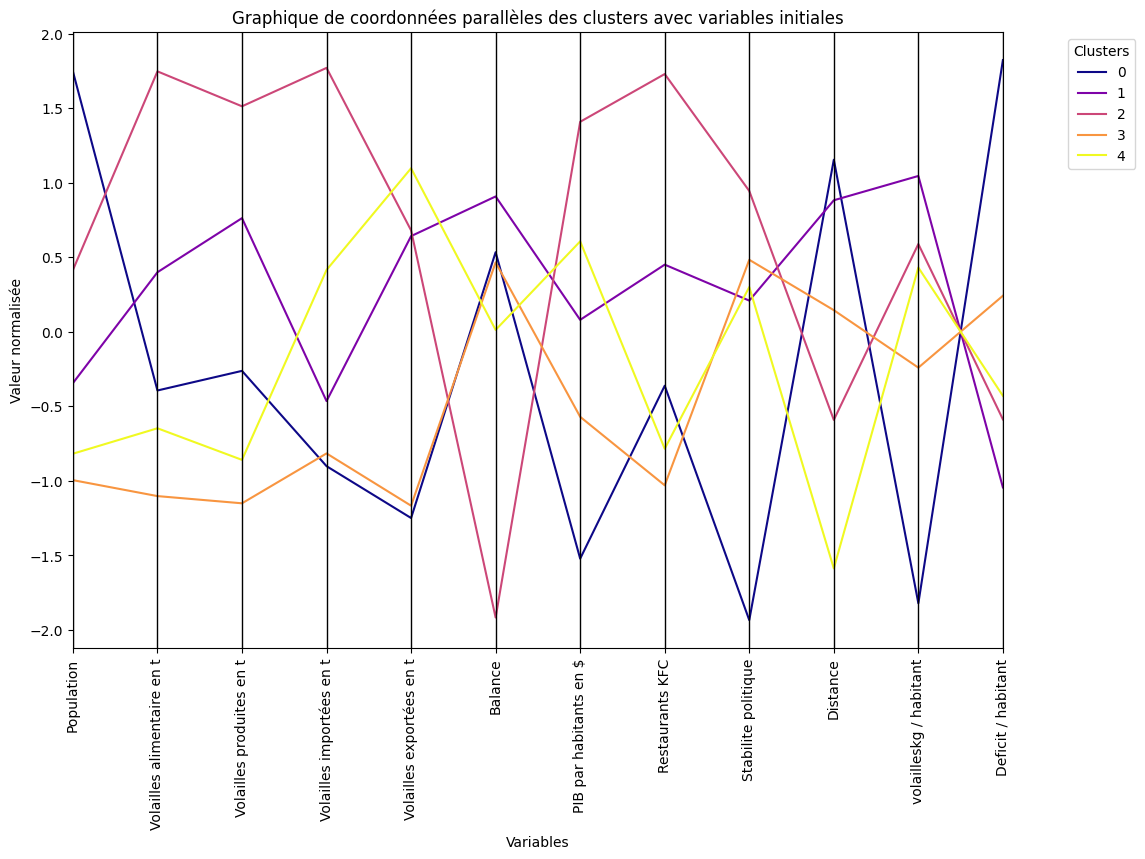

In [73]:
#Graphique coordonées parallèles avec variables initiales
#Valeurs moyenne de chaque clusters
df_quant['Cluster_CAH'] = df_scaled['Cluster_CAH']
df_meancah = df_quant.groupby("Cluster_CAH").mean().reset_index()

#Standardisation des données
features2 = df_meancah.columns[1:]
scaled_data2 = scaler.fit_transform(df_meancah[features2])

#Création d'un DataFrame avec les données standardisées
df_scaled2 = pd.DataFrame(scaled_data2, columns=features2)
df_scaled2['Cluster_CAH'] = df_meancah['Cluster_CAH']

# Visualisation avec un graphique de coordonnées parallèles
plt.figure(figsize=(12, 8))
parallel_coordinates(df_scaled2, 'Cluster_CAH', colormap=plt.cm.plasma)
plt.title('Graphique de coordonnées parallèles des clusters avec variables initiales')
plt.xlabel('Variables')
plt.ylabel('Valeur normalisée')
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [74]:
#Calculer le Silhouette Score
sil_score = (silhouette_score(df_scaledquant.drop('Cluster_CAH', axis=1), df_scaledquant['Cluster_CAH'])).round(2)
print("Silhouette score :", sil_score * 100, "%")

Silhouette score : 68.0 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.5. - Clustering via K-means</h3>
</div>

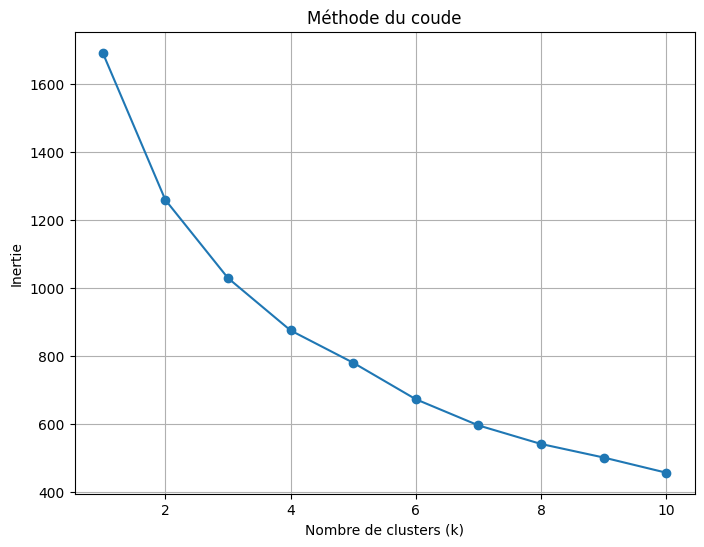

In [76]:
#Définir une gamme de valeurs pour k
k_range = range(1, 11)
inertia = []

#Calculer l'inertie pour chaque k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Tracer l'inertie en fonction de k
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.grid(True)
plt.show()

In [78]:
#Clustering - K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

In [79]:
#Nombre de valeurs par clusters
df_quant['Cluster_KMeans'] = clusters_kmeans
pd.Series(kmeans.labels_).value_counts()

1    74
0    44
3    18
2     5
Name: count, dtype: int64

In [81]:
#Valeurs moyenne de chaque clusters
df_mean = df_quant.groupby("Cluster_KMeans").mean().reset_index()

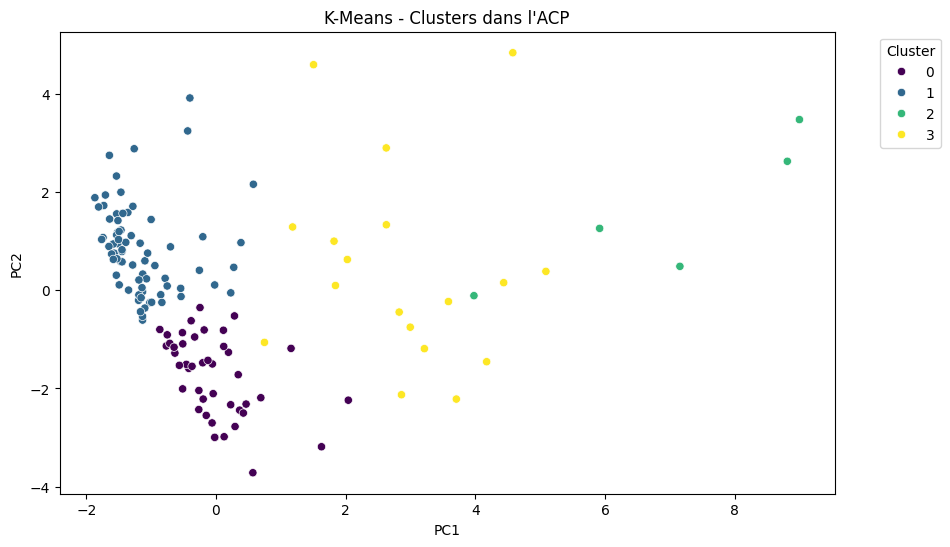

In [82]:
#Visualisation des clusters dans l'ACP pour PC1 et PC2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_quant['Cluster_KMeans'], palette="viridis")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means - Clusters dans l\'ACP')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

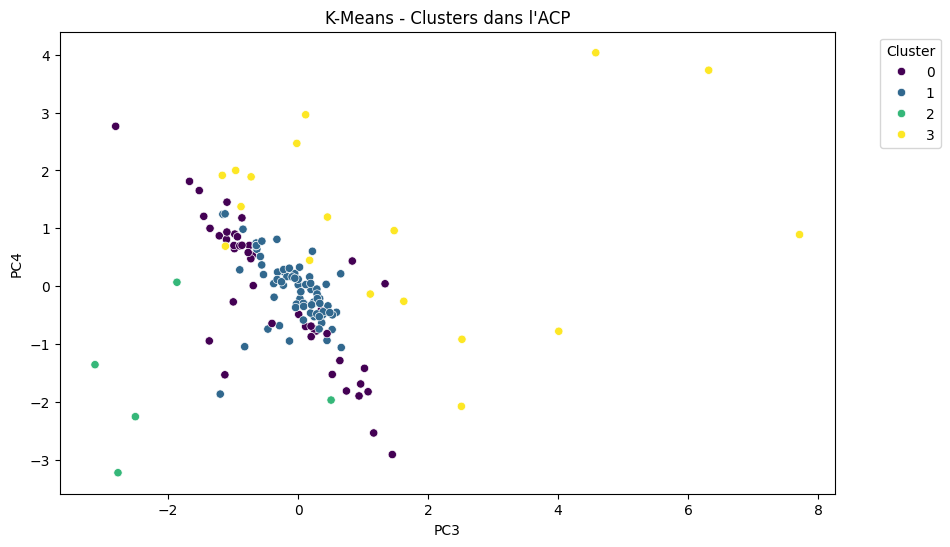

In [84]:
#Visualisation des clusters dans l'ACP pour PC3 et PC4
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 2], y=X_pca[:, 3], hue=df_quant['Cluster_KMeans'], palette="viridis")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('K-Means - Clusters dans l\'ACP')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [86]:
#Composition des clusters
df_data['Cluster_KMeans'] = df_quant['Cluster_KMeans']
cluster_composition = df_data.groupby('Cluster_KMeans')['Zone'].value_counts()

#Afficher les résultats
for cluster, zones in cluster_composition.groupby(level=0):
    print(f"Cluster {cluster}:")
    print(zones)
    print("-" * 30)

Cluster 0:
Cluster_KMeans  Zone                           
0               Antigua-et-Barbuda                 1
                Autriche                           1
                Barbade                            1
                Belize                             1
                Bolivie (État plurinational de)    1
                Bulgarie                           1
                Bélarus                            1
                Chili                              1
                Chypre                             1
                Costa Rica                         1
                Cuba                               1
                Danemark                           1
                Dominique                          1
                Estonie                            1
                Fidji                              1
                Finlande                           1
                Gabon                              1
                Grenade                 

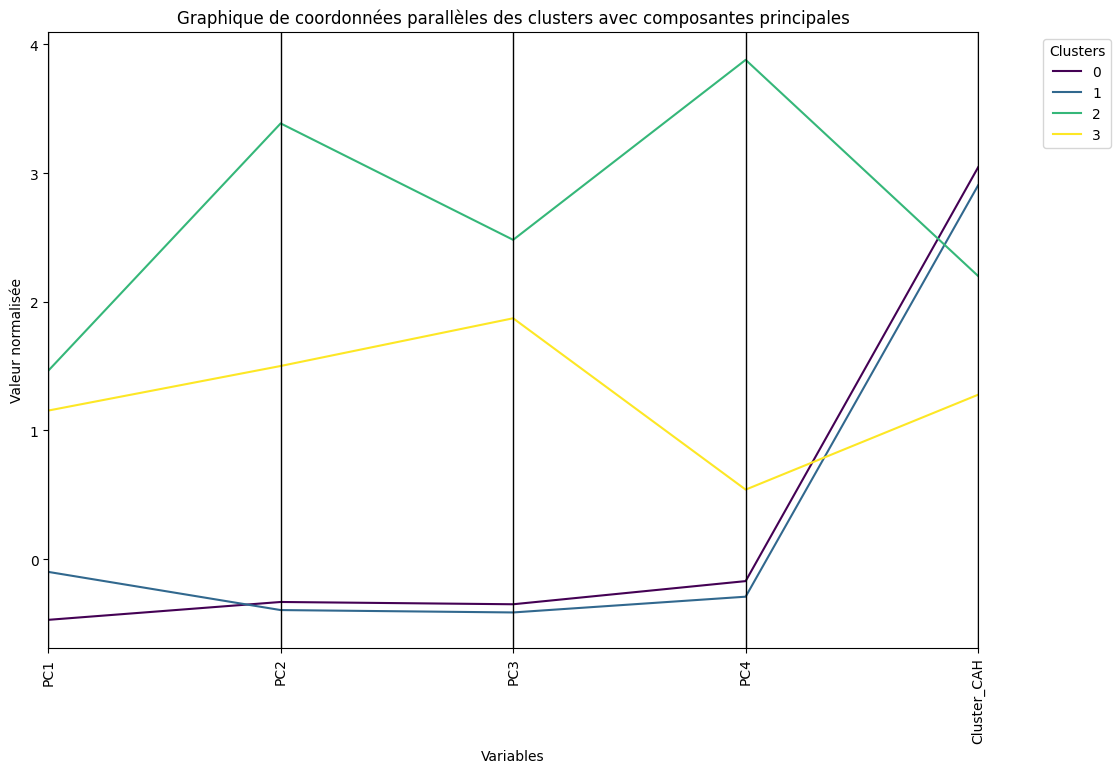

In [88]:
#Graphique coordonées parallèles avec composantes principales
df_scaled['Cluster_KMeans'] = clusters_kmeans
df_scaledmean = df_scaled.drop(columns=["Zone"])
df_scaledmean = df_scaledmean.groupby("Cluster_KMeans").mean().reset_index()

plt.figure(figsize=(12, 8))
parallel_coordinates(df_scaledmean, 'Cluster_KMeans', colormap=plt.cm.viridis)
plt.title('Graphique de coordonnées parallèles des clusters avec composantes principales')
plt.xlabel('Variables')
plt.ylabel('Valeur normalisée')
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.grid()
plt.show()

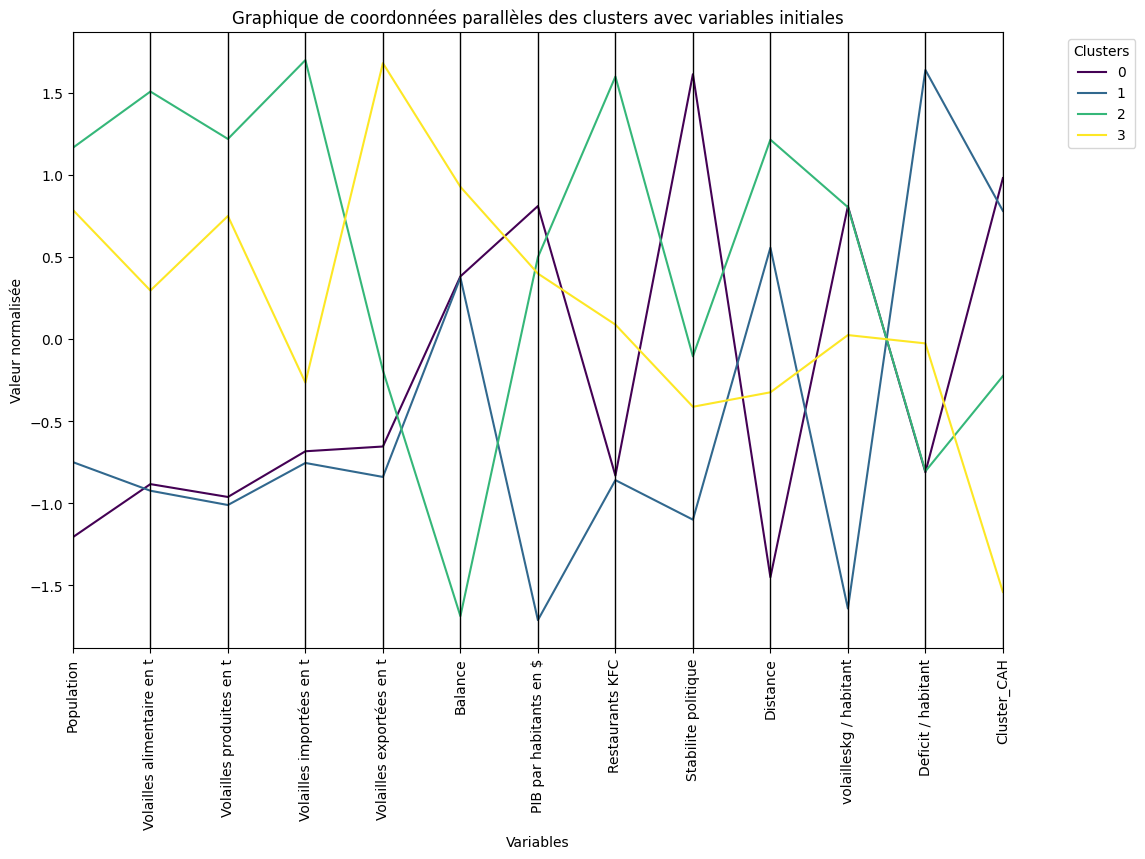

In [91]:
#Graphique coordonées parallèles avec variables initiales
#Standardisation des données
features = df_mean.columns[1:]
scaled_data = scaler.fit_transform(df_mean[features])

# Création d'un DataFrame avec les données standardisées
df_scaled1 = pd.DataFrame(scaled_data, columns=features)
df_scaled1['Cluster_KMeans'] = df_mean['Cluster_KMeans']

# Visualisation avec un graphique de coordonnées parallèles
plt.figure(figsize=(12, 8))
parallel_coordinates(df_scaled1, 'Cluster_KMeans', colormap=plt.cm.viridis)
plt.title('Graphique de coordonnées parallèles des clusters avec variables initiales')
plt.xlabel('Variables')
plt.ylabel('Valeur normalisée')
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [92]:
#Calcul du score d'algorithme
silhouette_weight = 0.5
db_weight = 0.3
inertia_weight = 0.2

silhouette_avg = silhouette_score(X_pca, clusters_kmeans)
db_index = davies_bouldin_score(X_pca, clusters_kmeans)

#Calcul du score
global_score = ((silhouette_weight * silhouette_avg + 
                db_weight * db_index +
                inertia_weight * (1 / kmeans.inertia_))).round(3)

print("Score global d'algorithme :", global_score * 100, "%")

Score global d'algorithme : 52.0 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.6. - Analyse et choix des pays les plus pertinents </h3>
</div>

In [94]:
#Selection du cluster 2 de l'analyse CAH et du cluster 2 de l'analyse K-means
df_filtered = df_data[(df_data['Cluster_KMeans'] == 2) | (df_data['Cluster_CAH'] == 2)]

print(f"6 pays ressortent : {', '.join(df_filtered['Zone'].value_counts().index.tolist())}.")

6 pays ressortent : Afrique du Sud, Allemagne, Arabie saoudite, Japon, Mexique, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord.


In [95]:
#Filtrer les zones avec une stabilité politique > -0.3
df_filteredpol = df_filtered[df_filtered['Stabilite politique'] > - 0.3]

print(f"Si l'on filtre sur les pays tendant vers une stabilité politique, 4 pays ressortent : {', '.join(df_filteredpol['Zone'].value_counts().index.tolist())}.")

Si l'on filtre sur les pays tendant vers une stabilité politique, 4 pays ressortent : Afrique du Sud, Allemagne, Japon, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2. - Analyse exploratoire de df_iso</h3>
</div>

In [97]:
#Suppression des colonnes non numériques
df_quant1 = df_iso.drop(columns=["Zone", "Année"])
Y = df_quant1.values

#Standardisation des données
Y_scaled = scaler.fit_transform(Y)

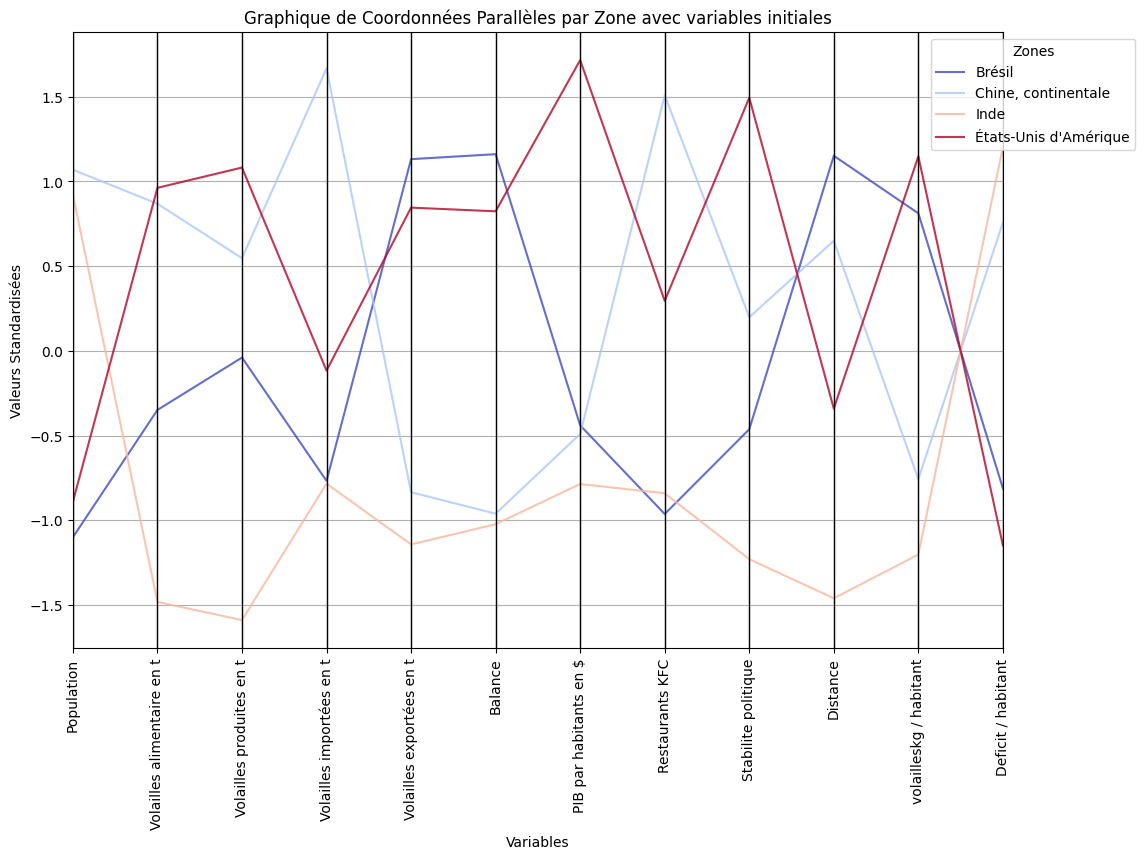

In [98]:
#Graphique coordonées parallèles avec variables initiales
df_scaledy = pd.DataFrame(Y_scaled, columns=df_quant1.columns)  # Crée un DataFrame avec les colonnes numériques
df_scaledy["Zone"] = df_iso["Zone"].values  # Ajoute les zones comme catégories

#Tracer les coordonnées parallèles
plt.figure(figsize=(12, 8))
parallel_coordinates(df_scaledy, class_column="Zone", colormap='coolwarm', alpha=0.8)
plt.title("Graphique de Coordonnées Parallèles par Zone avec variables initiales")
plt.xlabel("Variables")
plt.ylabel("Valeurs Standardisées")
plt.grid(True)
plt.legend(title='Zones', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2. - Analyse et choix les plus pertinents</h3>
</div>

In [100]:
#Filtrer les zones avec une stabilité politique > -0.3
df_isopol = df_iso[df_iso['Stabilite politique'] > -0.3]

print(f"Si l'on filtre sur les pays tendant vers une stabilité politique, 2 pays ressortent  : {', '.join(df_isopol['Zone'].value_counts().index.tolist())}.")

Si l'on filtre sur les pays tendant vers une stabilité politique, 2 pays ressortent  : Chine, continentale, États-Unis d'Amérique.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Choix des pays</h2>
</div>

In [104]:
#Regroupeme,nt des 6 pays selectionnés
df_pays = pd.concat([df_filteredpol, df_isopol], ignore_index=True)

In [105]:
#Affichage du dataframe
df_pays

,Zone,Année,Population,Volailles alimentaire en t,Volailles produites en t,Volailles importées en t,Volailles exportées en t,Balance,PIB par habitants en $,Restaurants KFC,Stabilite politique,Distance,volailleskg / habitant,Deficit / habitant,Cluster_CAH,Cluster_KMeans
0,Afrique du Sud,2017,57009756,2035000.0,1667000.0,514000.0,63000.0,-451000.0,6723.93,955.0,-0.28,8702,35.70,-16.34,1.0,2.0
1,Allemagne,2017,82658409,1609000.0,1514000.0,842000.0,646000.0,-196000.0,44670.22,189.0,0.57,804,19.47,-0.11,2.0,3.0
2,Japon,2017,127502725,2359000.0,2215000.0,1069000.0,10000.0,-1059000.0,38928.95,1131.0,1.10,9834,18.50,0.86,2.0,2.0
3,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66727460,2131000.0,1814000.0,779000.0,359000.0,-420000.0,40568.47,909.0,0.38,970,31.94,-12.58,2.0,2.0
4,"Chine, continentale",2017,1421021791,17518000.0,18236000.0,452000.0,576000.0,124000.0,8729.14,7980.0,-0.23,8139,12.33,7.03,NaN,NaN
5,États-Unis d'Amérique,2017,325084756,18100000.0,21914000.0,123000.0,3692000.0,3569000.0,59468.23,4062.0,0.26,7714,55.68,-36.32,NaN,NaN


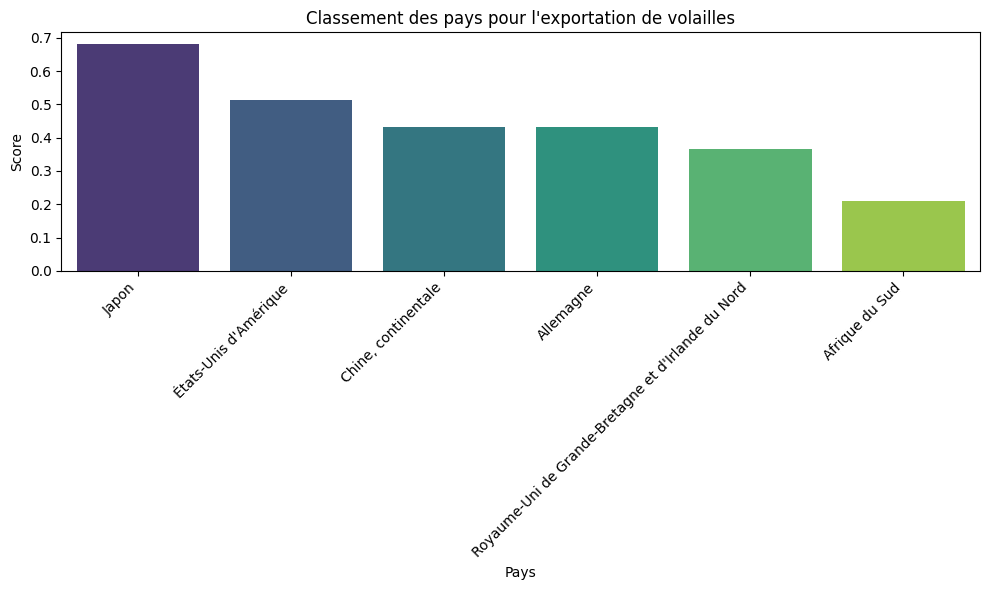

                                                Zone     Score
2                                              Japon  0.682260
5                              États-Unis d'Amérique  0.512410
4                                Chine, continentale  0.431812
1                                          Allemagne  0.431377
3  Royaume-Uni de Grande-Bretagne et d'Irlande du...  0.366576
0                                     Afrique du Sud  0.209874


In [108]:
#Classement des pays selon un score

#Étape 1 : Sélection des variables pertinentes
variables = [
    "Population",
    "Volailles importées en t",
    "Balance",
    "PIB par habitants en $",
    "Stabilite politique",
    "Distance",
    "volailleskg / habitant",
    "Restaurants KFC"]

#Étape 2 : Normalisation des variables
scaler = MinMaxScaler()
df_normalized = df_pays.copy()
df_normalized[variables] = scaler.fit_transform(df_pays[variables])

#Étape 3 : Pondération des critères
weights = {
    "Population": 0.1,
    "Volailles importées en t": 0.2,
    "Balance": 0.1,
    "PIB par habitants en $": 0.2,
    "Stabilite politique": 0.2,
    "Distance": 0.15,
    "volailleskg / habitant": -0.05,
    "Restaurants KFC": 0.1}

#Calcul du score pondéré
df_normalized["Score"] = sum(df_normalized[var] * weight for var, weight in weights.items())

#Étape 4 : Classement des pays
df_ranked = df_normalized.sort_values(by="Score", ascending=False)

#Étape 5 : Visualisation des résultats
plt.figure(figsize=(10, 6))
sns.barplot(x="Zone", y="Score", data=df_ranked, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Classement des pays pour l'exportation de volailles")
plt.ylabel("Score")
plt.xlabel("Pays")
plt.tight_layout()
plt.show()

print(df_ranked[["Zone", "Score"]])

In [111]:
#Filtrer les zones avec une distance < 1000
df_paysdist = df_pays[df_pays['Distance'] < 1000]

print(f"Si l'on filtre sur les pays les moins éloignés géographiquement, 2 pays ressortent  : {', '.join(df_paysdist['Zone'].value_counts().index.tolist())}.")

Si l'on filtre sur les pays les moins éloignés géographiquement, 2 pays ressortent  : Allemagne, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord.
